In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pathlib import Path


# loading algorithms
from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet, Lasso, Ridge

# tree based libs
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# less complicated models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 

# model prep and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve




#display all
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)


In [83]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [84]:
train_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,w,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.0,0.0,483.34,0.0,1.0,Individual,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,w,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.0,0.0,478.68,0.0,1.0,Individual,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,w,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.0,0.0,448.95,0.0,1.0,Individual,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,w,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.0,0.0,85.76,1.0,1.0,Individual,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,w,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.0,0.0,1056.49,0.0,1.0,Individual,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [85]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  12180 non-null  int64  
 1   index                       12180 non-null  int64  
 2   loan_amnt                   12180 non-null  float64
 3   int_rate                    12180 non-null  float64
 4   installment                 12180 non-null  float64
 5   home_ownership              12180 non-null  object 
 6   annual_inc                  12180 non-null  float64
 7   verification_status         12180 non-null  object 
 8   loan_status                 12180 non-null  object 
 9   pymnt_plan                  12180 non-null  object 
 10  dti                         12180 non-null  float64
 11  delinq_2yrs                 12180 non-null  float64
 12  inq_last_6mths              12180 non-null  float64
 13  open_acc                    121

In [86]:
test_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,67991,67991,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,low_risk,n,19.75,0.0,1.0,18.0,0.0,9471.0,45.0,w,33249.95,33249.95,9740.00,9740.00,6750.05,2989.95,0.0,0.0,0.0,814.70,0.0,1.0,Individual,0.0,0.0,377773.0,1.0,6.0,1.0,2.0,9.0,61443.0,51.0,1.0,1.0,3218.0,26.0,86500.0,0.0,2.0,1.0,3.0,20987.0,65129.0,12.7,0.0,0.0,192.0,180.0,2.0,2.0,3.0,44.0,2.0,0.0,6.0,6.0,6.0,10.0,20.0,11.0,22.0,6.0,18.0,0.0,0.0,0.0,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,25429,25429,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,low_risk,n,11.52,2.0,0.0,8.0,0.0,1280.0,12.0,w,0.00,0.00,6185.59,6185.59,6000.00,185.59,0.0,0.0,0.0,5773.27,0.0,1.0,Individual,0.0,0.0,23460.0,1.0,1.0,1.0,1.0,6.0,22180.0,94.0,0.0,1.0,713.0,68.0,11000.0,1.0,1.0,3.0,2.0,2933.0,4680.0,20.7,0.0,0.0,143.0,144.0,22.0,6.0,0.0,59.0,6.0,0.0,2.0,3.0,2.0,2.0,3.0,7.0,9.0,3.0,8.0,0.0,0.0,0.0,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,38496,38496,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,low_risk,n,6.74,0.0,0.0,6.0,0.0,4757.0,6.0,w,0.00,0.00,3603.73,3603.73,3600.00,3.73,0.0,0.0,0.0,3607.12,0.0,1.0,Individual,0.0,0.0,19183.0,0.0,3.0,0.0,0.0,40.0,14426.0,96.0,1.0,2.0,4757.0,83.0,8100.0,0.0,0.0,2.0,2.0,3837.0,2543.0,65.2,0.0,0.0,54.0,107.0,9.0,9.0,0.0,9.0,7.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,1.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,19667,19667,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,low_risk,n,12.13,0.0,2.0,7.0,0.0,12731.0,21.0,w,17624.06,17624.06,4766.37,4766.37,2375.94,2390.43,0.0,0.0,0.0,478.33,0.0,1.0,Individual,0.0,0.0,43817.0,1.0,2.0,1.0,3.0,11.0,31086.0,86.0,3.0,3.0,5917.0,78.0,20500.0,0.0,3.0,3.0,6.0,7303.0,6496.0,52.9,0.0,0.0,132.0,290.0,4.0,4.0,0.0,7.0,5.0,0.0,2.0,4.0,3.0,8.0,8.0,5.0,12.0,4.0,7.0,0.0,0.0,0.0,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,37505,37505,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,low_risk,n,16.08,0.0,3.0,6.0,0.0,10413.0,6.0,w,0.00,0.00,3602.48,3602.48,3600.00,2.48,0.0,0.0,0.0,3604.96,0.0,1.0,Individual,0.0,0.0,32448.0,2.0,2.0,1.0,1.0,9.0,22035.0,88.0,2.0,2.0,5985.0,71.0,21000.0,3.0,1.0,14.0,3.0,5408.0,10587.0,49.6,0.0,0.0,40.0,159.0,3.0,3.0,0.0,3.0,3.0,0.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,6.0,0.0,0.0,0.0,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N


In [87]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4702 entries, 0 to 4701
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4702 non-null   int64  
 1   index                       4702 non-null   int64  
 2   loan_amnt                   4702 non-null   float64
 3   int_rate                    4702 non-null   float64
 4   installment                 4702 non-null   float64
 5   home_ownership              4702 non-null   object 
 6   annual_inc                  4702 non-null   float64
 7   verification_status         4702 non-null   object 
 8   loan_status                 4702 non-null   object 
 9   pymnt_plan                  4702 non-null   object 
 10  dti                         4702 non-null   float64
 11  delinq_2yrs                 4702 non-null   float64
 12  inq_last_6mths              4702 non-null   float64
 13  open_acc                    4702 

In [88]:
# drop unnamed and info columns in both data sets


In [89]:
train_df.shape

(12180, 86)

## Set Up Data for analysis

In [90]:
#loan status is target
train_df.loan_status.value_counts()
#data is in a 50-50 split for low and high risk

low_risk     6090
high_risk    6090
Name: loan_status, dtype: int64

In [91]:
#create string data frame to start encoding them (excluding loan status)
#step inspired by Professor during homework review

stringsc = []

for col in train_df.columns:
    if (train_df[col].dtype == 'object') & (col != "loan_status"):
        stringsc.append(col)

#build dataframe
df_str = train_df.loc[:, stringsc]
df_str.head()

,home_ownership,verification_status,pymnt_plan,initial_list_status,application_type,hardship_flag,debt_settlement_flag
0,MORTGAGE,Not Verified,n,w,Individual,N,N
1,MORTGAGE,Source Verified,n,w,Individual,N,N
2,MORTGAGE,Source Verified,n,w,Individual,N,N
3,RENT,Not Verified,n,w,Individual,N,N
4,MORTGAGE,Source Verified,n,w,Individual,N,N


In [92]:
#ID the columns with string values and their categories
for col in df_str.columns:

    if type(df_str[col].values[0]) == str:
        print(col)
        print(df_str[col].nunique())
        print(df_str[col].value_counts())
        print()

home_ownership
4
MORTGAGE    5800
RENT        4944
OWN         1371
ANY           65
Name: home_ownership, dtype: int64

verification_status
3
Not Verified       5301
Source Verified    4881
Verified           1998
Name: verification_status, dtype: int64

pymnt_plan
1
n    12180
Name: pymnt_plan, dtype: int64

initial_list_status
2
w    11158
f     1022
Name: initial_list_status, dtype: int64

application_type
2
Individual    10400
Joint App      1780
Name: application_type, dtype: int64

hardship_flag
2
N    11832
Y      348
Name: hardship_flag, dtype: int64

debt_settlement_flag
2
N    12175
Y        5
Name: debt_settlement_flag, dtype: int64



In [93]:
#drop payment plan-- there is no unique information
df_str.drop(["pymnt_plan"], axis=1, inplace=True)


In [94]:
#take care of binary categories 
df_le = df_str.loc[:, ["initial_list_status", "application_type", "hardship_flag", "debt_settlement_flag"]]
df_le["initial_list_status"] = [1 if x == "w" else 0 for x in df_le.initial_list_status]
df_le["application_type"] = [1 if x == "Individual" else 0 for x in df_le.application_type]
df_le["hardship_flag"] = [1 if x == "N" else 0 for x in df_le.hardship_flag]
df_le["debt_settlement_flag"] = [1 if x == "N" else 0 for x in df_le.debt_settlement_flag]
df_le.head()

,initial_list_status,application_type,hardship_flag,debt_settlement_flag
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1


In [95]:
#one hot endoing for rest
cols_oh = ["home_ownership", "verification_status"]
df_oh = pd.get_dummies(df_str.loc[:, cols_oh])
df_oh.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,0,1,0,0,1,0,0
1,0,1,0,0,0,1,0
2,0,1,0,0,0,1,0
3,0,0,0,1,1,0,0
4,0,1,0,0,0,1,0


In [96]:
#get columns that are integers/ numeric
numbers = []

for col in train_df.columns:
    if (train_df[col].dtype == 'float64') & (col != "loan_status"):
        numbers.append(col)

#build dataframe
df_num = train_df.loc[:, numbers]
df_num.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.0,0.0,483.34,0.0,1.0,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0
1,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.0,0.0,478.68,0.0,1.0,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0
2,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.0,0.0,448.95,0.0,1.0,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0
3,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.0,0.0,85.76,1.0,1.0,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0
4,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.0,0.0,1056.49,0.0,1.0,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0


In [97]:
##UNSCALED DATA
df_unscaled = pd.concat([df_num, df_oh, df_le], axis=1)
df_unscaled.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,debt_settlement_flag
0,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.0,0.0,483.34,0.0,1.0,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,0,1,0,0,1,0,0,1,1,1,1
1,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.0,0.0,478.68,0.0,1.0,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,0,1,0,0,0,1,0,1,1,1,1
2,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.0,0.0,448.95,0.0,1.0,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,0,1,0,0,0,1,0,1,1,1,1
3,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.0,0.0,85.76,1.0,1.0,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,0,0,0,1,1,0,0,1,1,1,1
4,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.0,0.0,1056.49,0.0,1.0,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,0,1,0,0,0,1,0,1,1,1,1


In [98]:
# drop columns to reduce collinearity
cols_drop = ["home_ownership_ANY", "verification_status_Not Verified"]
df_unscaled = df_unscaled.drop(cols_drop, axis=1)
df_unscaled.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,debt_settlement_flag
0,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.0,0.0,483.34,0.0,1.0,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,1,0,0,0,0,1,1,1,1
1,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.0,0.0,478.68,0.0,1.0,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,1,0,0,1,0,1,1,1,1
2,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.0,0.0,448.95,0.0,1.0,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,1,0,0,1,0,1,1,1,1
3,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.0,0.0,85.76,1.0,1.0,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,0,0,1,0,0,1,1,1,1
4,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.0,0.0,1056.49,0.0,1.0,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,1,0,0,1,0,1,1,1,1


In [99]:
#add loan status back in with label encode
df_unscaled["loan_status"] = train_df.loan_status

df_unscaled["loan_status"] = [1 if x == "high_risk" else 0 for x in df_unscaled.loan_status]
df_unscaled.head()


,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,debt_settlement_flag,loan_status
0,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.0,0.0,483.34,0.0,1.0,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,1,0,0,0,0,1,1,1,1,0
1,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.0,0.0,478.68,0.0,1.0,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,1,0,0,1,0,1,1,1,1,0
2,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.0,0.0,448.95,0.0,1.0,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,1,0,0,1,0,1,1,1,1,0
3,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.0,0.0,85.76,1.0,1.0,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,0,0,1,0,0,1,1,1,1,0
4,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.0,0.0,1056.49,0.0,1.0,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,1,0,0,1,0,1,1,1,1,0


In [100]:
#scaled data

In [101]:
# subset and scale data using Z-Scores

#rename dataframe to avoid cross contamination
dfNumScal= df_num.copy()
scaler = StandardScaler().fit(dfNumScal)
df_scale = pd.DataFrame(scaler.transform(dfNumScal), columns=dfNumScal.columns)
df_scale.head()


,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,-0.393112,0.736585,-0.087609,0.790279,0.309615,-0.320026,-0.695401,0.376917,-0.351986,0.979339,1.083336,-0.071368,-0.071217,-1.093789,-1.093659,-0.924224,-0.968314,-0.150981,0.0,0.0,0.053954,-0.133126,0.0,-0.009061,-0.139714,1.806319,0.785406,1.179572,2.140917,3.136183,-0.516428,0.741144,-0.020749,-0.225280,-0.669299,3.455342,0.616623,0.503602,-0.282801,3.506591,-0.132295,1.186045,1.177360,-0.430820,0.951911,-0.071082,-0.009061,0.601757,1.907460,-0.648755,-0.648350,-0.175635,-0.661807,0.131913,-0.359420,-1.167625,-0.523893,-0.989682,-0.509289,1.071847,-0.334151,0.465341,-0.525210,0.379269,0.0,-0.009061,-0.148869,1.326667,0.617581,0.500053,-0.351986,0.0,1.965731,1.010651,0.156409,2.188821
1,0.351681,-0.191716,-0.103427,0.196561,-0.473994,2.170653,-0.695401,0.539402,-0.351986,-0.354346,-0.350335,0.195949,0.196078,0.736269,0.736426,0.511144,0.847978,-0.150981,0.0,0.0,0.048334,-0.133126,0.0,-0.009061,-0.139714,-0.551749,-0.871517,-0.435953,-0.881145,-0.610564,0.220799,-0.507964,-0.832495,-0.862659,0.453420,-0.332941,-0.422608,-0.500258,-0.282801,-0.578497,-0.534629,-0.015813,-0.624212,-0.448260,0.199035,-0.071082,-0.009061,0.685436,-0.228403,-0.042949,1.009132,-0.175635,-0.194150,0.467448,0.323961,0.397217,0.610258,0.222235,-0.072617,-0.589139,0.832750,0.090251,0.608016,0.541807,0.0,-0.009061,-0.148869,-1.188713,-1.069844,0.007255,-0.351986,0.0,-0.344265,-0.585044,-0.479179,-0.399905
2,0.254003,-0.320805,-0.204342,0.635913,-0.473157,-0.320026,-0.695401,-0.110538,-0.351986,-0.039187,0.924039,0.260977,0.261102,0.118673,0.118822,0.083729,0.135087,-0.150981,0.0,0.0,0.012484,-0.133126,0.0,-0.009061,-0.139714,2.692184,-0.043055,1.179572,0.126209,0.013894,-0.663873,1.034879,1.692938,-0.862659,-1.043538,0.915749,2.202816,-0.372541,0.342678,-0.578497,-0.132295,-0.616742,2.528656,-0.506821,0.837731,-0.071082,-0.009061,2.174926,0.767648,0.986922,-0.316854,1.018135,5.016891,-0.371388,0.323961,-0.385204,-0.807431,-0.686703,-0.509289,2.093992,-0.917601,-0.784958,-0.808517,-0.108345,0.0,-0.009061,-0.148869,-0.685637,-0.991097,0.007255,-0.351986,0.0,2.230882,0.875447,-0.214679,0.655196
3,-1.406519,-0.320805,-1.388060,-0.266539,-0.188665,-0.320026,-0.695401,-0.110538,2.682121,-0.388681,-0.429984,-1.195351,-1.195107,-1.269408,-1.269280,-1.060536,-1.145120,-0.150981,0.0,0.0,-0.425476,6.485154,0.0,-0.009061,0.289225,-0.784679,0.785406,0.210257,1.133563,0.013894,-0.442705,-0.632115,0.340027,0.412098,0.453420,-0.686628,-0.477304,-0.354660,1.593635,0.783199,-0.132295,0.284652,-0.760909,-0.102659,-0.646613,-0.071082,-0.009061,0.183361,-0.187329,-0.709335,-0.814099,-0.772520,-0.695211,0.131913,-0.359420,0.397217,0.043182,0.222235,-0.290953,-0.205835,-0.139667,-0.284838,0.041403,-0.108345,0.0,-0.009061,-0.148869,0.823591,0.617581,-0.482592,2.682121,0.0,-0.815953,-0.706007,-0.321269,-0.783830
4,1.230781,0.385387,1.857873,0.255933,0.216736,-0.320026,1.759668,0.051947,-0.351986,2.1160

In [102]:
##SCALED DATA
df_scaled = pd.concat([df_scale, df_oh, df_le], axis=1)
df_scaled.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,debt_settlement_flag
0,-0.393112,0.736585,-0.087609,0.790279,0.309615,-0.320026,-0.695401,0.376917,-0.351986,0.979339,1.083336,-0.071368,-0.071217,-1.093789,-1.093659,-0.924224,-0.968314,-0.150981,0.0,0.0,0.053954,-0.133126,0.0,-0.009061,-0.139714,1.806319,0.785406,1.179572,2.140917,3.136183,-0.516428,0.741144,-0.020749,-0.225280,-0.669299,3.455342,0.616623,0.503602,-0.282801,3.506591,-0.132295,1.186045,1.177360,-0.430820,0.951911,-0.071082,-0.009061,0.601757,1.907460,-0.648755,-0.648350,-0.175635,-0.661807,0.131913,-0.359420,-1.167625,-0.523893,-0.989682,-0.509289,1.071847,-0.334151,0.465341,-0.525210,0.379269,0.0,-0.009061,-0.148869,1.326667,0.617581,0.500053,-0.351986,0.0,1.965731,1.010651,0.156409,2.188821,0,1,0,0,1,0,0,1,1,1,1
1,0.351681,-0.191716,-0.103427,0.196561,-0.473994,2.170653,-0.695401,0.539402,-0.351986,-0.354346,-0.350335,0.195949,0.196078,0.736269,0.736426,0.511144,0.847978,-0.150981,0.0,0.0,0.048334,-0.133126,0.0,-0.009061,-0.139714,-0.551749,-0.871517,-0.435953,-0.881145,-0.610564,0.220799,-0.507964,-0.832495,-0.862659,0.453420,-0.332941,-0.422608,-0.500258,-0.282801,-0.578497,-0.534629,-0.015813,-0.624212,-0.448260,0.199035,-0.071082,-0.009061,0.685436,-0.228403,-0.042949,1.009132,-0.175635,-0.194150,0.467448,0.323961,0.397217,0.610258,0.222235,-0.072617,-0.589139,0.832750,0.090251,0.608016,0.541807,0.0,-0.009061,-0.148869,-1.188713,-1.069844,0.007255,-0.351986,0.0,-0.344265,-0.585044,-0.479179,-0.399905,0,1,0,0,0,1,0,1,1,1,1
2,0.254003,-0.320805,-0.204342,0.635913,-0.473157,-0.320026,-0.695401,-0.110538,-0.351986,-0.039187,0.924039,0.260977,0.261102,0.118673,0.118822,0.083729,0.135087,-0.150981,0.0,0.0,0.012484,-0.133126,0.0,-0.009061,-0.139714,2.692184,-0.043055,1.179572,0.126209,0.013894,-0.663873,1.034879,1.692938,-0.862659,-1.043538,0.915749,2.202816,-0.372541,0.342678,-0.578497,-0.132295,-0.616742,2.528656,-0.506821,0.837731,-0.071082,-0.009061,2.174926,0.767648,0.986922,-0.316854,1.018135,5.016891,-0.371388,0.323961,-0.385204,-0.807431,-0.686703,-0.509289,2.093992,-0.917601,-0.784958,-0.808517,-0.108345,0.0,-0.009061,-0.148869,-0.685637,-0.991097,0.007255,-0.351986,0.0,2.230882,0.875447,-0.214679,0.655196,0,1,0,0,0,1,0,1,1,1,1
3,-1.406519,-0.320805,-1.388060,-0.266539,-0.188665,-0.320026,-0.695401,-0.110538,2.682121,-0.388681,-0.429984,-1.195351,-1.195107,-1.269408,-1.269280,-1.060536,-1.145120,-0.150981,0.0,0.0,-0.425476,6.485154,0.0,-0.009061,0.289225,-0.784679,0.785406,0.210257,1.133563,0.013894,-0.442705,-0.632115,0.340027,0.412098,0.453420,-0.686628,-0.477304,-0.354660,1.593635,0.783199,-0.132295,0.284652,-0.760909,-0.102659,-0.646613,-0.071082,-0.009061,0.183361,-0.187329,-0.709335,-0.814099,-0.

In [103]:
cols_drop = ["home_ownership_ANY", "verification_status_Not Verified"]
df_scaled = df_scaled.drop(cols_drop, axis=1)
df_scaled.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,debt_settlement_flag
0,-0.393112,0.736585,-0.087609,0.790279,0.309615,-0.320026,-0.695401,0.376917,-0.351986,0.979339,1.083336,-0.071368,-0.071217,-1.093789,-1.093659,-0.924224,-0.968314,-0.150981,0.0,0.0,0.053954,-0.133126,0.0,-0.009061,-0.139714,1.806319,0.785406,1.179572,2.140917,3.136183,-0.516428,0.741144,-0.020749,-0.225280,-0.669299,3.455342,0.616623,0.503602,-0.282801,3.506591,-0.132295,1.186045,1.177360,-0.430820,0.951911,-0.071082,-0.009061,0.601757,1.907460,-0.648755,-0.648350,-0.175635,-0.661807,0.131913,-0.359420,-1.167625,-0.523893,-0.989682,-0.509289,1.071847,-0.334151,0.465341,-0.525210,0.379269,0.0,-0.009061,-0.148869,1.326667,0.617581,0.500053,-0.351986,0.0,1.965731,1.010651,0.156409,2.188821,1,0,0,0,0,1,1,1,1
1,0.351681,-0.191716,-0.103427,0.196561,-0.473994,2.170653,-0.695401,0.539402,-0.351986,-0.354346,-0.350335,0.195949,0.196078,0.736269,0.736426,0.511144,0.847978,-0.150981,0.0,0.0,0.048334,-0.133126,0.0,-0.009061,-0.139714,-0.551749,-0.871517,-0.435953,-0.881145,-0.610564,0.220799,-0.507964,-0.832495,-0.862659,0.453420,-0.332941,-0.422608,-0.500258,-0.282801,-0.578497,-0.534629,-0.015813,-0.624212,-0.448260,0.199035,-0.071082,-0.009061,0.685436,-0.228403,-0.042949,1.009132,-0.175635,-0.194150,0.467448,0.323961,0.397217,0.610258,0.222235,-0.072617,-0.589139,0.832750,0.090251,0.608016,0.541807,0.0,-0.009061,-0.148869,-1.188713,-1.069844,0.007255,-0.351986,0.0,-0.344265,-0.585044,-0.479179,-0.399905,1,0,0,1,0,1,1,1,1
2,0.254003,-0.320805,-0.204342,0.635913,-0.473157,-0.320026,-0.695401,-0.110538,-0.351986,-0.039187,0.924039,0.260977,0.261102,0.118673,0.118822,0.083729,0.135087,-0.150981,0.0,0.0,0.012484,-0.133126,0.0,-0.009061,-0.139714,2.692184,-0.043055,1.179572,0.126209,0.013894,-0.663873,1.034879,1.692938,-0.862659,-1.043538,0.915749,2.202816,-0.372541,0.342678,-0.578497,-0.132295,-0.616742,2.528656,-0.506821,0.837731,-0.071082,-0.009061,2.174926,0.767648,0.986922,-0.316854,1.018135,5.016891,-0.371388,0.323961,-0.385204,-0.807431,-0.686703,-0.509289,2.093992,-0.917601,-0.784958,-0.808517,-0.108345,0.0,-0.009061,-0.148869,-0.685637,-0.991097,0.007255,-0.351986,0.0,2.230882,0.875447,-0.214679,0.655196,1,0,0,1,0,1,1,1,1
3,-1.406519,-0.320805,-1.388060,-0.266539,-0.188665,-0.320026,-0.695401,-0.110538,2.682121,-0.388681,-0.429984,-1.195351,-1.195107,-1.269408,-1.269280,-1.060536,-1.145120,-0.150981,0.0,0.0,-0.425476,6.485154,0.0,-0.009061,0.289225,-0.784679,0.785406,0.210257,1.133563,0.013894,-0.442705,-0.632115,0.340027,0.412098,0.453420,-0.686628,-0.477304,-0.354660,1.593635,0.783199,-0.132295,0.284652,-0.760909,-0.102659,-0.646613,-0.071082,-0.009061,0.183361,-0.187329,-0.709335,-0.814099,-0.772520,-0.695211,0.131913,-0.359420,0.397217,0.043182,0.222235,-

In [104]:
#add loan status back in with label encode
df_scaled["loan_status"] = train_df.loan_status

df_scaled["loan_status"] = [1 if x == "high_risk" else 0 for x in df_scaled.loan_status]
df_scaled.head()


,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,debt_settlement_flag,loan_status
0,-0.393112,0.736585,-0.087609,0.790279,0.309615,-0.320026,-0.695401,0.376917,-0.351986,0.979339,1.083336,-0.071368,-0.071217,-1.093789,-1.093659,-0.924224,-0.968314,-0.150981,0.0,0.0,0.053954,-0.133126,0.0,-0.009061,-0.139714,1.806319,0.785406,1.179572,2.140917,3.136183,-0.516428,0.741144,-0.020749,-0.225280,-0.669299,3.455342,0.616623,0.503602,-0.282801,3.506591,-0.132295,1.186045,1.177360,-0.430820,0.951911,-0.071082,-0.009061,0.601757,1.907460,-0.648755,-0.648350,-0.175635,-0.661807,0.131913,-0.359420,-1.167625,-0.523893,-0.989682,-0.509289,1.071847,-0.334151,0.465341,-0.525210,0.379269,0.0,-0.009061,-0.148869,1.326667,0.617581,0.500053,-0.351986,0.0,1.965731,1.010651,0.156409,2.188821,1,0,0,0,0,1,1,1,1,0
1,0.351681,-0.191716,-0.103427,0.196561,-0.473994,2.170653,-0.695401,0.539402,-0.351986,-0.354346,-0.350335,0.195949,0.196078,0.736269,0.736426,0.511144,0.847978,-0.150981,0.0,0.0,0.048334,-0.133126,0.0,-0.009061,-0.139714,-0.551749,-0.871517,-0.435953,-0.881145,-0.610564,0.220799,-0.507964,-0.832495,-0.862659,0.453420,-0.332941,-0.422608,-0.500258,-0.282801,-0.578497,-0.534629,-0.015813,-0.624212,-0.448260,0.199035,-0.071082,-0.009061,0.685436,-0.228403,-0.042949,1.009132,-0.175635,-0.194150,0.467448,0.323961,0.397217,0.610258,0.222235,-0.072617,-0.589139,0.832750,0.090251,0.608016,0.541807,0.0,-0.009061,-0.148869,-1.188713,-1.069844,0.007255,-0.351986,0.0,-0.344265,-0.585044,-0.479179,-0.399905,1,0,0,1,0,1,1,1,1,0
2,0.254003,-0.320805,-0.204342,0.635913,-0.473157,-0.320026,-0.695401,-0.110538,-0.351986,-0.039187,0.924039,0.260977,0.261102,0.118673,0.118822,0.083729,0.135087,-0.150981,0.0,0.0,0.012484,-0.133126,0.0,-0.009061,-0.139714,2.692184,-0.043055,1.179572,0.126209,0.013894,-0.663873,1.034879,1.692938,-0.862659,-1.043538,0.915749,2.202816,-0.372541,0.342678,-0.578497,-0.132295,-0.616742,2.528656,-0.506821,0.837731,-0.071082,-0.009061,2.174926,0.767648,0.986922,-0.316854,1.018135,5.016891,-0.371388,0.323961,-0.385204,-0.807431,-0.686703,-0.509289,2.093992,-0.917601,-0.784958,-0.808517,-0.108345,0.0,-0.009061,-0.148869,-0.685637,-0.991097,0.007255,-0.351986,0.0,2.230882,0.875447,-0.214679,0.655196,1,0,0,1,0,1,1,1,1,0
3,-1.406519,-0.320805,-1.388060,-0.266539,-0.188665,-0.320026,-0.695401,-0.110538,2.682121,-0.388681,-0.429984,-1.195351,-1.195107,-1.269408,-1.269280,-1.060536,-1.145120,-0.150981,0.0,0.0,-0.425476,6.485154,0.0,-0.009061,0.289225,-0.784679,0.785406,0.210257,1.133563,0.013894,-0.442705,-0.632115,0.340027,0.412098,0.453420,-0.686628,-0.477304,-0.354660,1.593635,0.783199,-0.132295,0.284652,-0.760909,-0.102659,-0.646613,-0.071082,-0.009061,0.183361,-0.187329,-0.709335,-0.814099,-0.772520,-0.695211,0.131913,-0.359420,0.397217,0

## Correlatated Columns

In [105]:
#correlations
corrs = abs(df_unscaled.corr())["loan_status"].sort_values(ascending=False)
print(corrs)

loan_status                            1.000000
int_rate                               0.241308
total_rec_int                          0.208996
total_rec_late_fee                     0.124084
out_prncp_inv                          0.101959
out_prncp                              0.101923
installment                            0.095323
acc_open_past_24mths                   0.088339
inq_last_6mths                         0.084456
hardship_flag                          0.081807
num_tl_op_past_12m                     0.080955
mths_since_recent_inq                  0.078746
inq_last_12m                           0.078254
total_bc_limit                         0.077632
open_rv_24m                            0.074387
bc_open_to_buy                         0.072173
mo_sin_old_rev_tl_op                   0.071942
total_rec_prncp                        0.071784
open_acc_6m                            0.071759
open_rv_12m                            0.064837
mo_sin_rcnt_rev_tl_op                  0

In [107]:
cols2 = list(corrs.loc[corrs < 0.08].index)
print(cols2)

['mths_since_recent_inq', 'inq_last_12m', 'total_bc_limit', 'open_rv_24m', 'bc_open_to_buy', 'mo_sin_old_rev_tl_op', 'total_rec_prncp', 'open_acc_6m', 'open_rv_12m', 'mo_sin_rcnt_rev_tl_op', 'max_bal_bc', 'inq_fi', 'last_pymnt_amnt', 'percent_bc_gt_75', 'home_ownership_MORTGAGE', 'loan_amnt', 'all_util', 'mths_since_recent_bc', 'total_rev_hi_lim', 'mort_acc', 'mo_sin_rcnt_tl', 'il_util', 'open_il_24m', 'open_il_12m', 'bc_util', 'mo_sin_old_il_acct', 'delinq_2yrs', 'verification_status_Verified', 'home_ownership_RENT', 'pct_tl_nvr_dlq', 'total_pymnt_inv', 'total_pymnt', 'tot_hi_cred_lim', 'home_ownership_OWN', 'num_actv_rev_tl', 'num_rev_tl_bal_gt_0', 'application_type', 'initial_list_status', 'revol_bal', 'num_actv_bc_tl', 'num_op_rev_tl', 'num_accts_ever_120_pd', 'mths_since_rcnt_il', 'collections_12_mths_ex_med', 'avg_cur_bal', 'tot_cur_bal', 'total_bal_il', 'debt_settlement_flag', 'num_bc_sats', 'dti', 'total_cu_tl', 'open_act_il', 'num_bc_tl', 'num_rev_accts', 'num_sats', 'open_acc

In [108]:
#drop columns with low correlations (making exceptions for one hot encoded columns if needed)
df_unscaled = df_unscaled.drop(cols2, axis=1)
df_unscaled.head()


,int_rate,installment,inq_last_6mths,out_prncp,out_prncp_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,policy_code,acc_open_past_24mths,num_tl_120dpd_2m,num_tl_op_past_12m,tax_liens,hardship_flag,loan_status
0,0.1797,483.34,0.0,12804.66,12804.66,382.99,0.0,0.0,0.0,1.0,9.0,0.0,5.0,0.0,1,0
1,0.1308,478.68,0.0,15152.97,15152.97,4189.99,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,1,0
2,0.1240,448.95,0.0,15724.23,15724.23,2695.75,0.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,1,0
3,0.1240,100.22,0.0,2930.77,2930.77,12.40,0.0,0.0,0.0,1.0,6.0,0.0,4.0,0.0,1,0
4,0.1612,1056.49,2.0,20778.03,20778.03,5542.02,0.0,0.0,0.0,1.0,4.0,0.0,2.0,0.0,1,0


In [109]:
df_unscaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   int_rate                 12180 non-null  float64
 1   installment              12180 non-null  float64
 2   inq_last_6mths           12180 non-null  float64
 3   out_prncp                12180 non-null  float64
 4   out_prncp_inv            12180 non-null  float64
 5   total_rec_int            12180 non-null  float64
 6   total_rec_late_fee       12180 non-null  float64
 7   recoveries               12180 non-null  float64
 8   collection_recovery_fee  12180 non-null  float64
 9   policy_code              12180 non-null  float64
 10  acc_open_past_24mths     12180 non-null  float64
 11  num_tl_120dpd_2m         12180 non-null  float64
 12  num_tl_op_past_12m       12180 non-null  float64
 13  tax_liens                12180 non-null  float64
 14  hardship_flag         

In [110]:
df_unscaled.columns

Index(['int_rate', 'installment', 'inq_last_6mths', 'out_prncp',
       'out_prncp_inv', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'policy_code', 'acc_open_past_24mths',
       'num_tl_120dpd_2m', 'num_tl_op_past_12m', 'tax_liens', 'hardship_flag',
       'loan_status'],
      dtype='object')

## Fit Models (without scaling)

Prediction:
The RandomForestClassifer model will probably work better on the unscaled data. This is because the RandomForestClassifer is a decision tree model, which while more complex behind the scenes and harder to explain, tends to show better accuracy.

However, the results may be due to overfitting. The LogisticRegression may be better for having consistent results in precision and accuracy between the training and testing data. 

Regardless, the RandomForestClassifer is my choice for being the more accurate of the two models. 


In [111]:
x_cols = ['int_rate', 'installment', 'inq_last_6mths', 'out_prncp',
       'out_prncp_inv', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'policy_code', 'acc_open_past_24mths',
       'num_tl_120dpd_2m', 'num_tl_op_past_12m', 'tax_liens', 'hardship_flag',]
X = df_unscaled.loc[:, x_cols].values
y = df_unscaled["loan_status"].values

In [112]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25, stratify=y)

print(len(X_train) / len(X))
print(len(X_test) / len(X))

0.75
0.25


In [113]:
#function for model from class
def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_train, train_preds)
    conf_matrix_train = confusion_matrix(y_train, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    print(conf_matrix_test)
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

TRAINING SET
              precision    recall  f1-score   support

           0       0.59      0.70      0.64      4567
           1       0.63      0.52      0.57      4568

    accuracy                           0.61      9135
   macro avg       0.61      0.61      0.61      9135
weighted avg       0.61      0.61      0.61      9135

[[3188 1379]
 [2178 2390]]

Testing SET
              precision    recall  f1-score   support

           0       0.59      0.70      0.64      1523
           1       0.63      0.51      0.56      1522

    accuracy                           0.61      3045
   macro avg       0.61      0.61      0.60      3045
weighted avg       0.61      0.61      0.60      3045

[[1070  453]
 [ 749  773]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


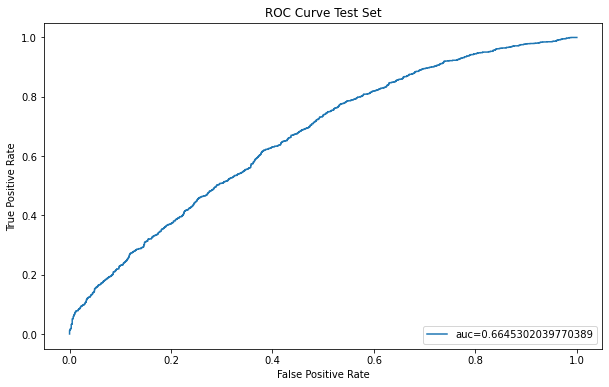

In [114]:
lr = LogisticRegression()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4567
           1       1.00      1.00      1.00      4568

    accuracy                           1.00      9135
   macro avg       1.00      1.00      1.00      9135
weighted avg       1.00      1.00      1.00      9135

[[4567    0]
 [   1 4567]]

Testing SET
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1523
           1       0.73      0.71      0.72      1522

    accuracy                           0.72      3045
   macro avg       0.72      0.72      0.72      3045
weighted avg       0.72      0.72      0.72      3045

[[1122  401]
 [ 437 1085]]


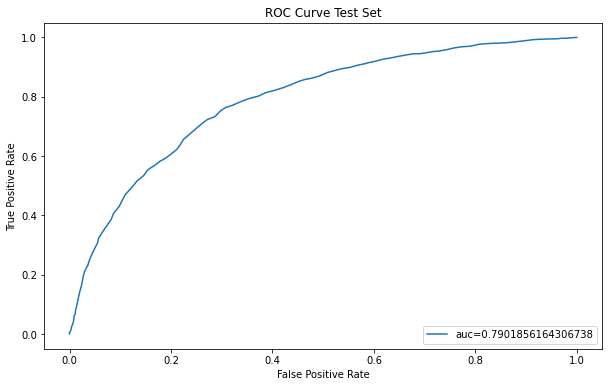

In [115]:
rf = RandomForestClassifier(random_state=42)
rf = evaluateModel(rf, X_train, y_train, X_test, y_test)

## Fit Models (with scaling)

Prediction:
For the same reasons stated above, the RandomForestClassifer model will probably work better on the scaled data. The scaled data will likely behave better on the model since the training will be easier on data that fits together. 

The overfitting will likely still occur on the scaled data, and I predict that the prediction and accuracy scores on the testing data for both models will be closer to each other than with the unscaled data.

Regardless, the RandomForestClassifer is my choice for being the more accurate of the two models. 

In [116]:
x_cols = ['int_rate', 'installment', 'inq_last_6mths', 'out_prncp',
       'out_prncp_inv', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'policy_code', 'acc_open_past_24mths',
       'num_tl_120dpd_2m', 'num_tl_op_past_12m', 'tax_liens', 'hardship_flag',]
X = df_scaled.loc[:, x_cols].values
y = df_scaled["loan_status"].values

In [117]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25, stratify=y)

print(len(X_train) / len(X))
print(len(X_test) / len(X))

0.75
0.25


TRAINING SET
              precision    recall  f1-score   support

           0       0.63      0.69      0.66      4567
           1       0.65      0.59      0.62      4568

    accuracy                           0.64      9135
   macro avg       0.64      0.64      0.64      9135
weighted avg       0.64      0.64      0.64      9135

[[3152 1415]
 [1889 2679]]

Testing SET
              precision    recall  f1-score   support

           0       0.62      0.70      0.66      1523
           1       0.66      0.56      0.60      1522

    accuracy                           0.63      3045
   macro avg       0.64      0.63      0.63      3045
weighted avg       0.64      0.63      0.63      3045

[[1073  450]
 [ 667  855]]


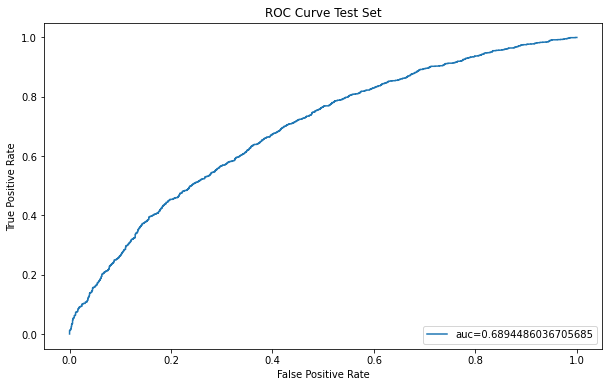

In [121]:
# Initialize the model
lr = LogisticRegression()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4567
           1       1.00      1.00      1.00      4568

    accuracy                           1.00      9135
   macro avg       1.00      1.00      1.00      9135
weighted avg       1.00      1.00      1.00      9135

[[4567    0]
 [   1 4567]]

Testing SET
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1523
           1       0.73      0.71      0.72      1522

    accuracy                           0.72      3045
   macro avg       0.72      0.72      0.72      3045
weighted avg       0.72      0.72      0.72      3045

[[1123  400]
 [ 438 1084]]


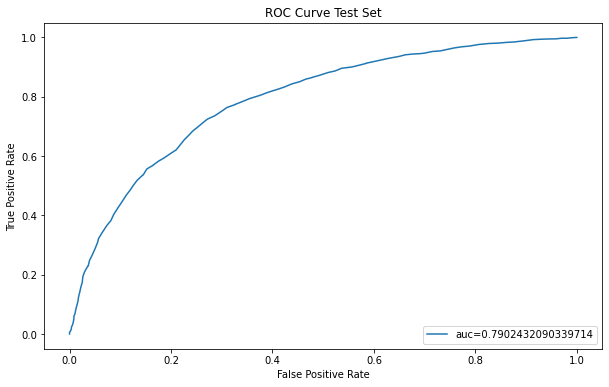

In [124]:
rf = RandomForestClassifier(random_state=42)
rf = evaluateModel(rf, X_train, y_train, X_test, y_test)

In [125]:
#attempt a few more models

TRAINING SET
              precision    recall  f1-score   support

           0       0.74      0.71      0.73      4567
           1       0.72      0.75      0.74      4568

    accuracy                           0.73      9135
   macro avg       0.73      0.73      0.73      9135
weighted avg       0.73      0.73      0.73      9135

[[3257 1310]
 [1140 3428]]

Testing SET
              precision    recall  f1-score   support

           0       0.71      0.70      0.70      1523
           1       0.70      0.71      0.71      1522

    accuracy                           0.70      3045
   macro avg       0.70      0.70      0.70      3045
weighted avg       0.70      0.70      0.70      3045

[[1067  456]
 [ 444 1078]]


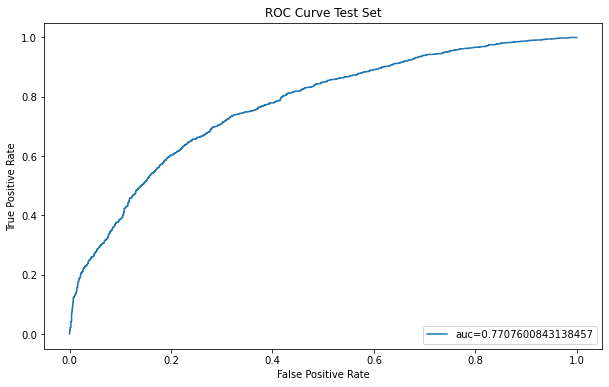

In [128]:
#gradient boost
gb = GradientBoostingClassifier(random_state=42)
gb = evaluateModel(gb, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4567
           1       0.89      0.89      0.89      4568

    accuracy                           0.89      9135
   macro avg       0.89      0.89      0.89      9135
weighted avg       0.89      0.89      0.89      9135

[[4079  488]
 [ 509 4059]]

Testing SET
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1523
           1       0.73      0.72      0.73      1522

    accuracy                           0.73      3045
   macro avg       0.73      0.73      0.73      3045
weighted avg       0.73      0.73      0.73      3045

[[1121  402]
 [ 420 1102]]


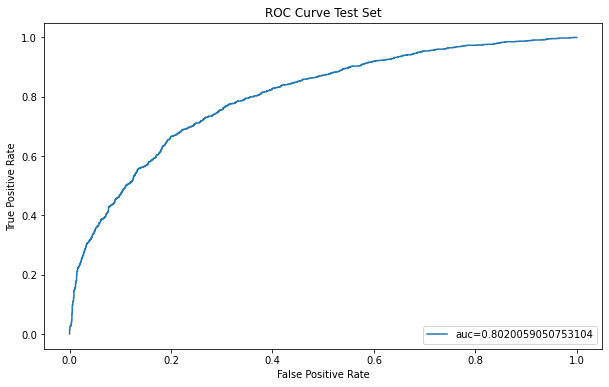

In [129]:
xgb = XGBClassifier(random_state=42)
xgb = evaluateModel(xgb, X_train, y_train, X_test, y_test)
#this is slightly more accurate and precise. I would likely choose this model.


## Final Model Decision

In [130]:
rf_final = RandomForestClassifier()
rf_final.fit(X, y)

RandomForestClassifier()

## Test on Test Data